In [2]:
#%pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

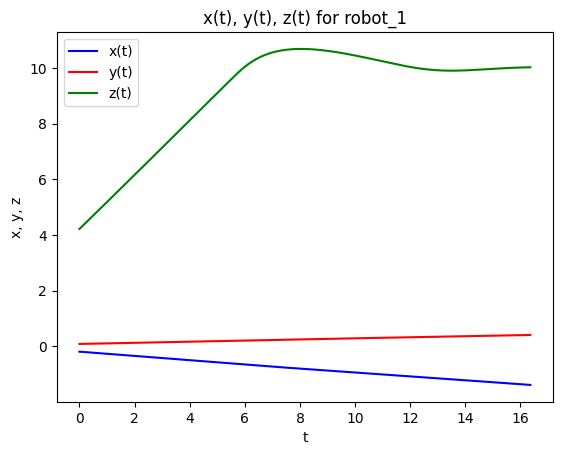

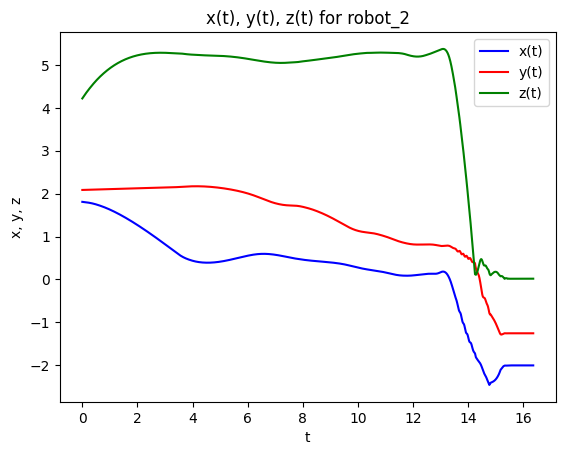

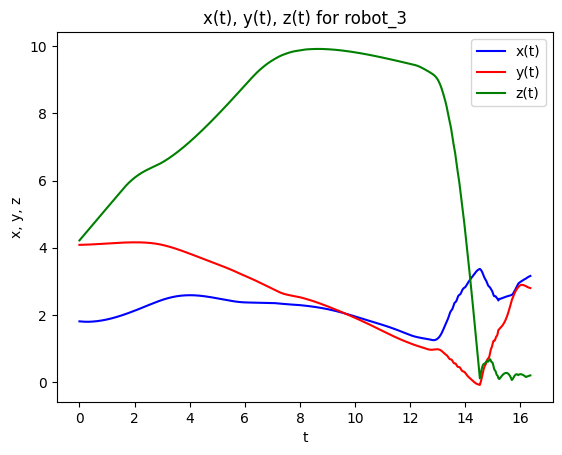

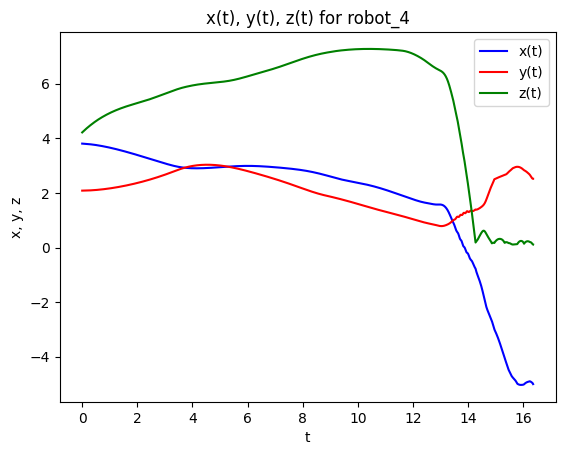

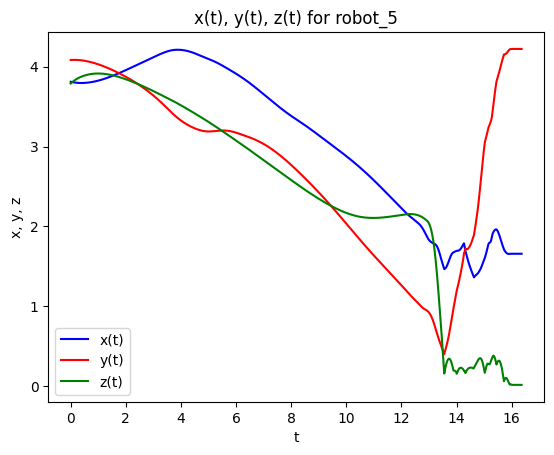

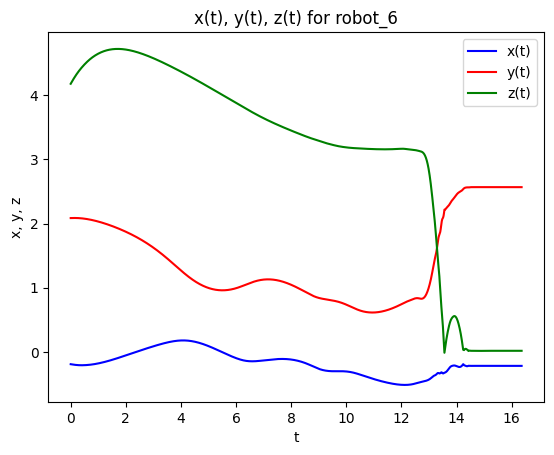

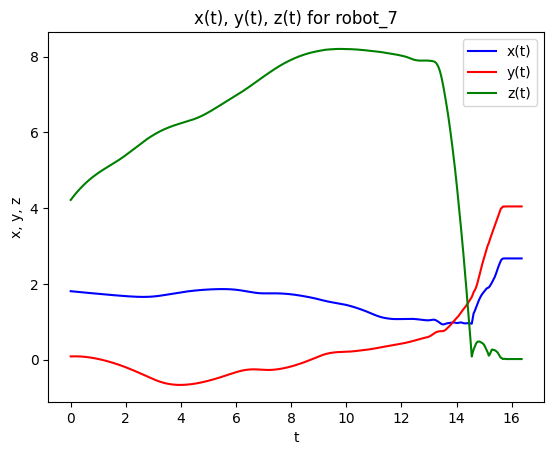

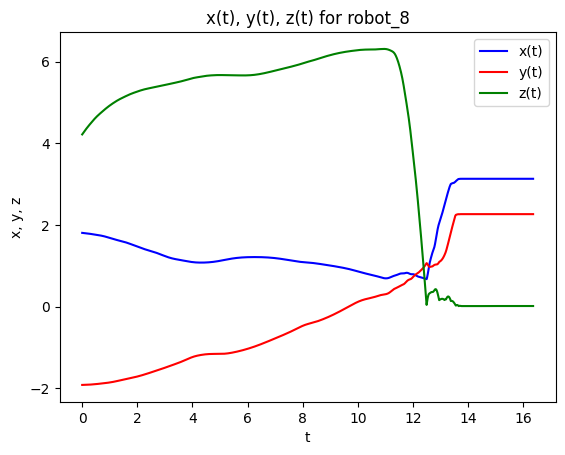

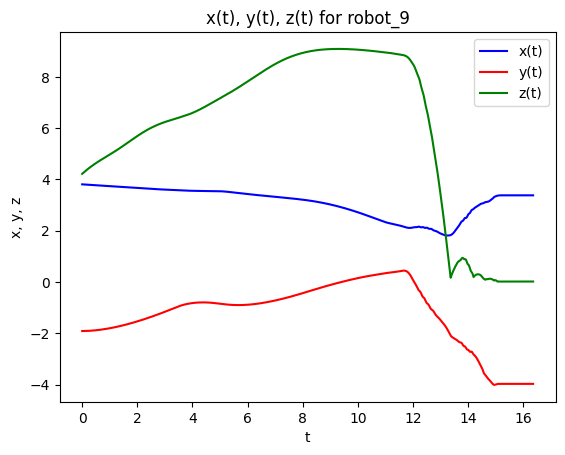

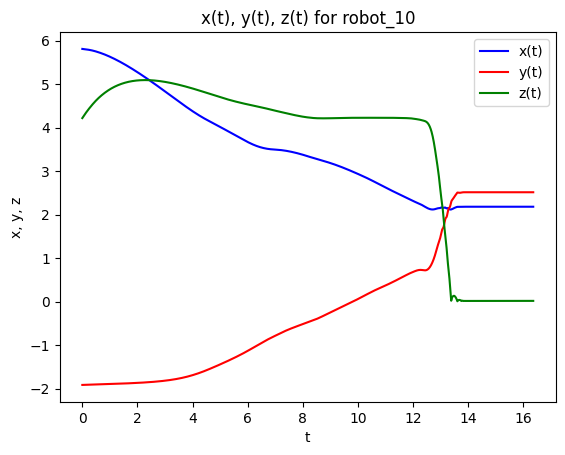

In [3]:
dt = 0.008
n = 10

for i in range(n):
    path = '../logs/log_4/robot_' + str(i + 1) + '.txt'

    with open(path, "r") as file:
        plt.title("x(t), y(t), z(t) for robot_" + str(i + 1))
        plt.xlabel('t')
        plt.ylabel('x, y, z')
        t = 0

        ts, xs, ys, zs = [], [], [], []

        for line in file:
                nums = [float(item) for item in line.rstrip().split(' ')]
                x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_x_plus, d_x_minus, d_y_plus, d_y_minus, d_z_plus, d_z_minus = nums

                ts.append(t)
                xs.append(x)
                ys.append(y)
                zs.append(z)

                t += dt

        plt.plot(ts, xs, color='blue', label='x(t)')
        plt.plot(ts, ys, color='red', label='y(t)')
        plt.plot(ts, zs, color='green', label='z(t)')
        plt.legend(fontsize=10)

        plt.show()

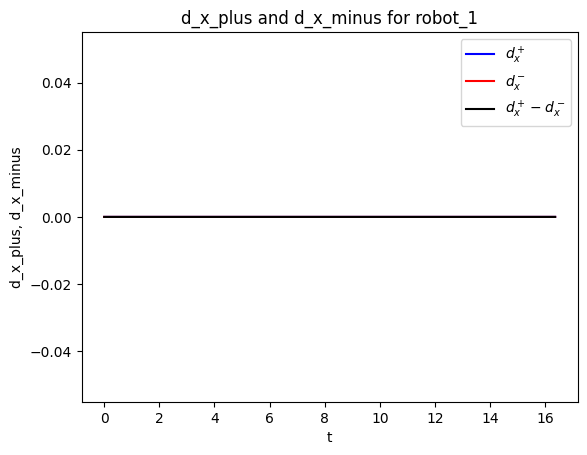

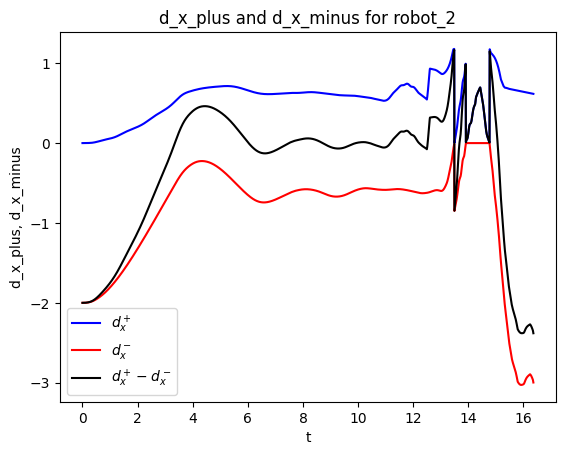

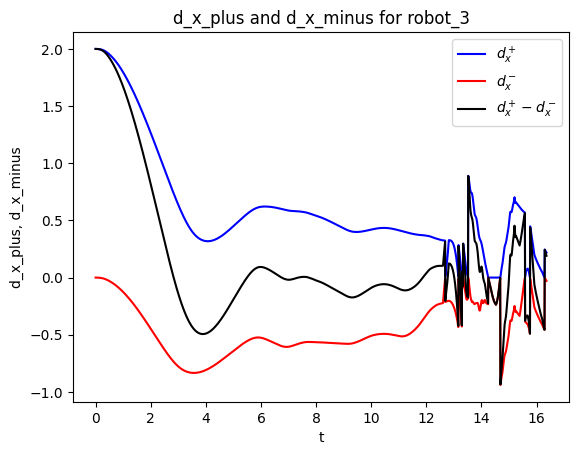

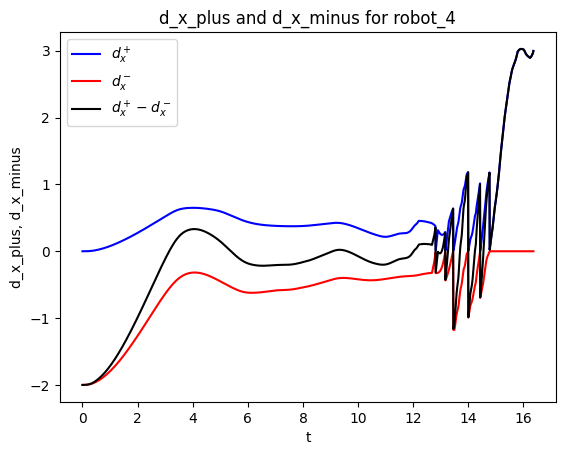

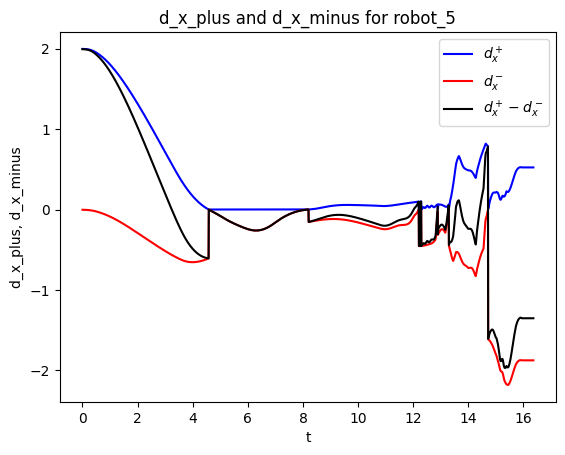

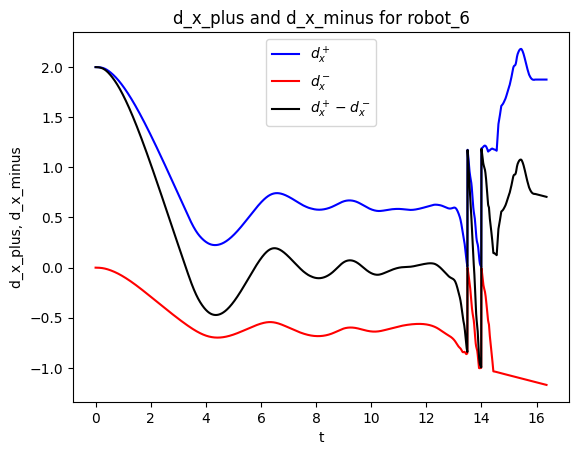

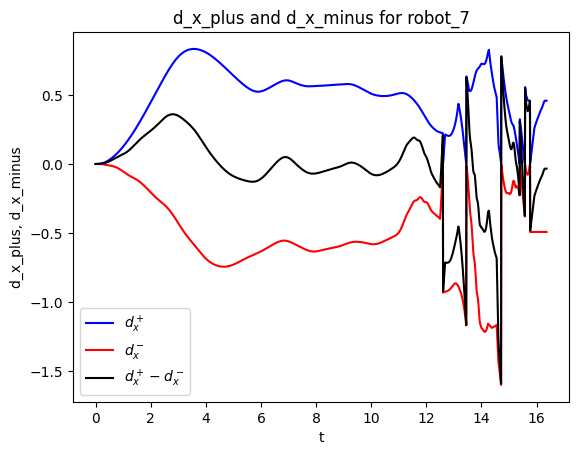

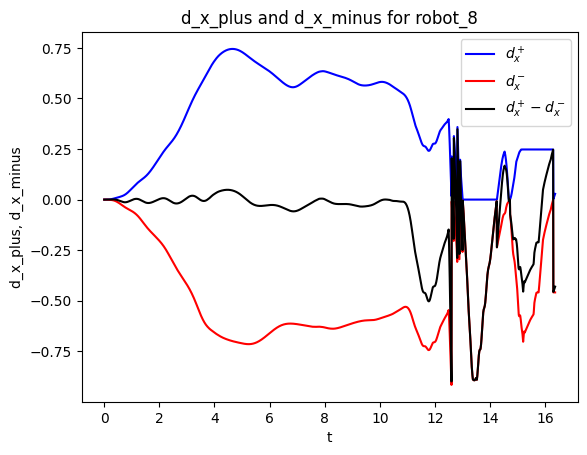

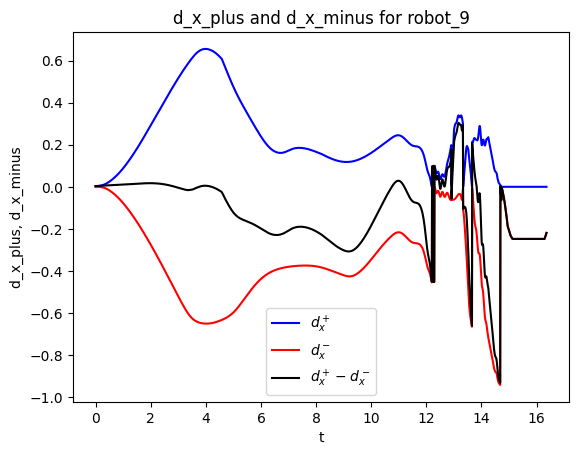

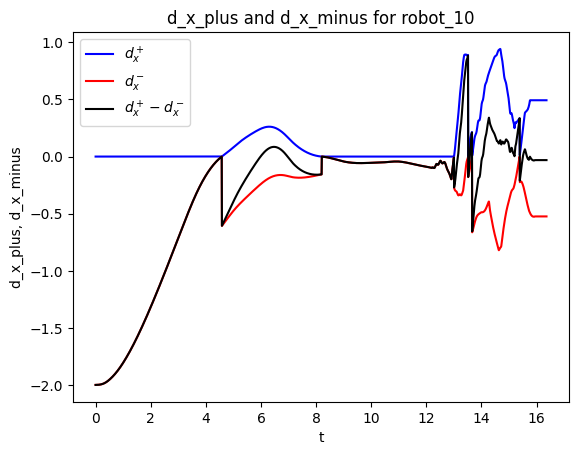

In [5]:
for i in range(n):
    path = '../logs/log_4/robot_' + str(i + 1) + '.txt'

    with open(path, "r") as file:
        plt.title("d_x_plus and d_x_minus for robot_" + str(i + 1))
        plt.xlabel('t')
        plt.ylabel('d_x_plus, d_x_minus')
        t = 0

        ts, dxs_plus, dxs_minus, diffs = [], [], [], []

        for line in file:
                nums = [float(item) for item in line.rstrip().split(' ')]
                x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_x_plus, d_x_minus, d_y_plus, d_y_minus, d_z_plus, d_z_minus = nums

                ts.append(t)
                dxs_plus.append(d_x_plus)
                dxs_minus.append(-d_x_minus)
                diffs.append(d_x_plus - d_x_minus)

                t += dt

        plt.plot(ts, dxs_plus, color='blue', label=r"$d_x^+$")
        plt.plot(ts, dxs_minus, color='red', label=r"$d_x^-$")
        plt.plot(ts, diffs, color='black', label=r"$d_x^+-d_x^-$")
        plt.legend(fontsize=10)

        plt.show()

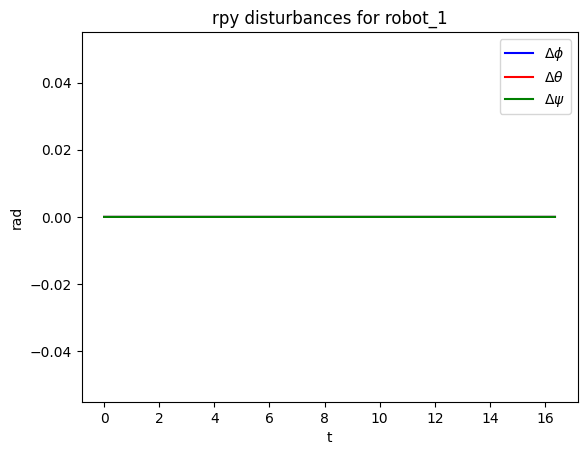

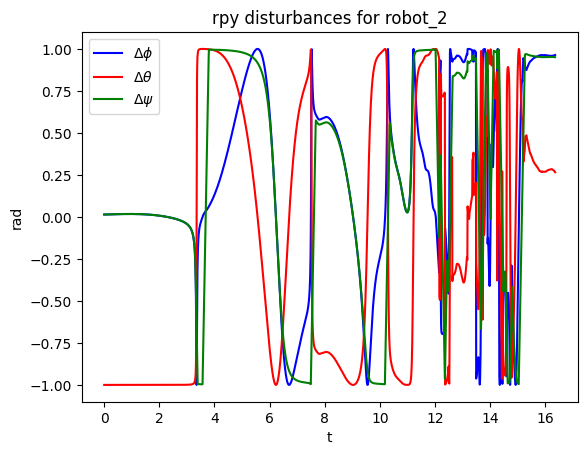

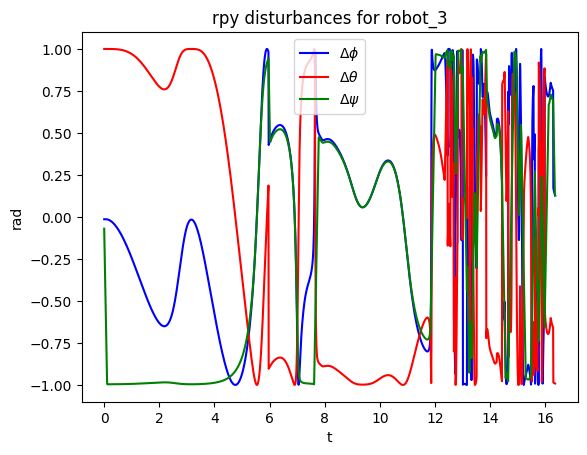

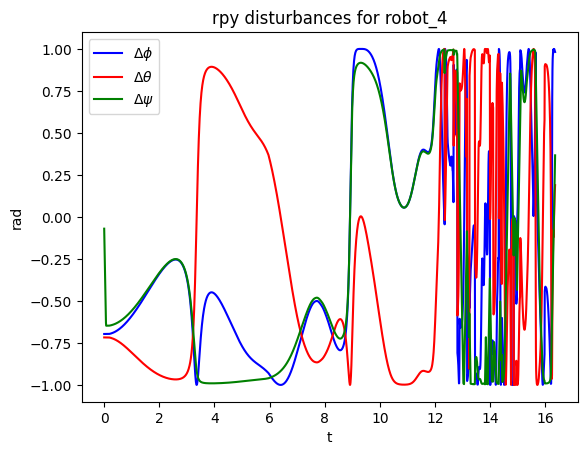

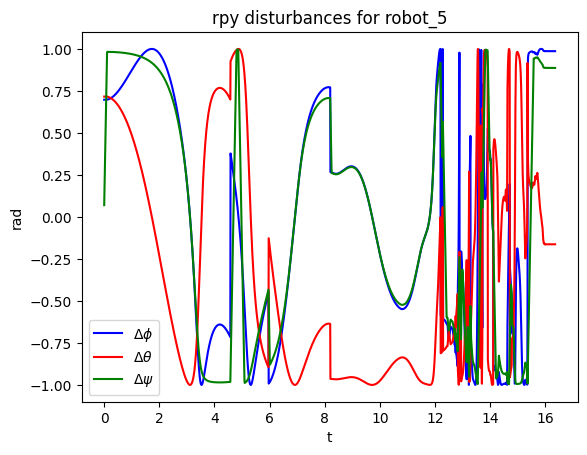

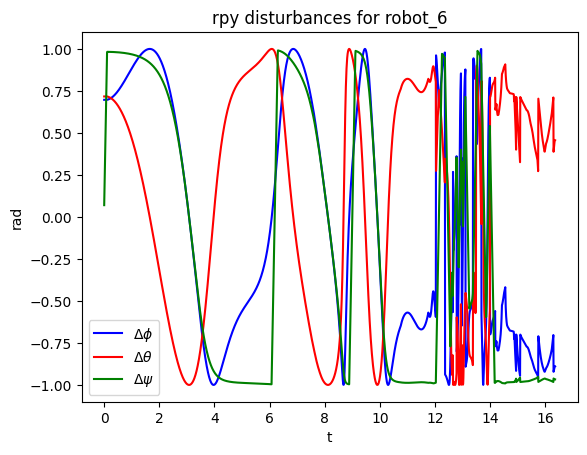

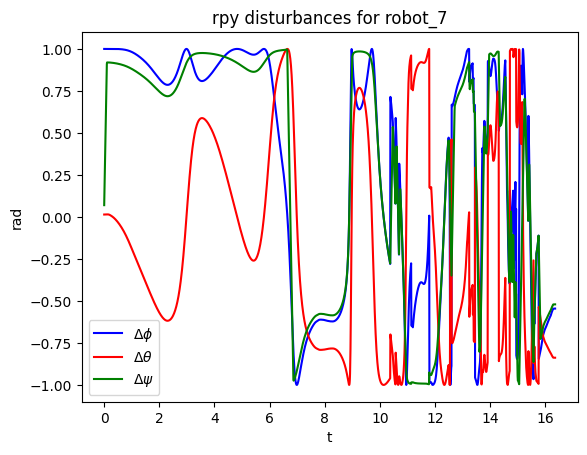

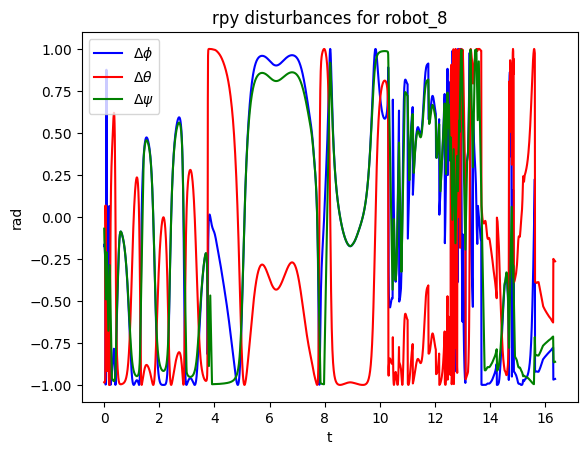

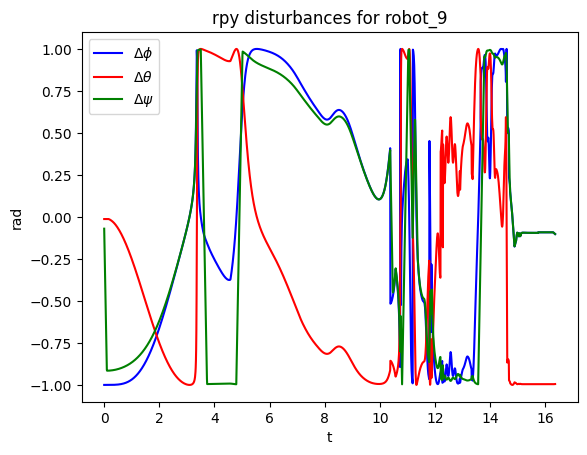

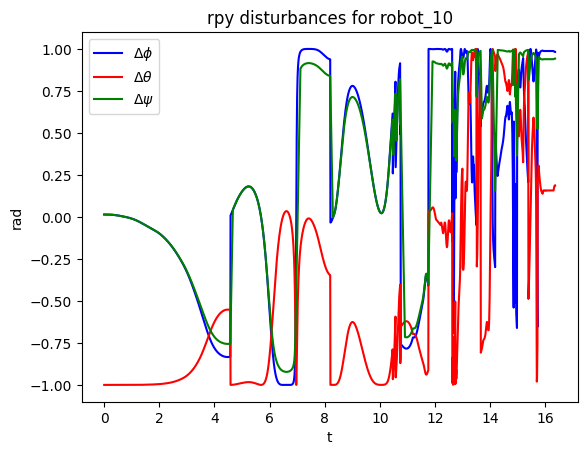

In [7]:
for i in range(n):
    path = '../logs/log_4/robot_' + str(i + 1) + '.txt'

    with open(path, "r") as file:
        plt.title("rpy disturbances for robot_" + str(i + 1))
        plt.xlabel('t')
        plt.ylabel('rad')
        t = 0

        ts, urolls, upitches, uyaws = [], [], [], []

        for line in file:
                nums = [float(item) for item in line.rstrip().split(' ')]
                x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_x_plus, d_x_minus, d_y_plus, d_y_minus, d_z_plus, d_z_minus = nums

                ts.append(t)
                urolls.append(u_roll)
                upitches.append(u_pitch)
                uyaws.append(u_yaw)

                t += dt

        plt.plot(ts, urolls, color='blue', label=r"$\Delta\phi$")
        plt.plot(ts, upitches, color='red', label=r"$\Delta\theta$")
        plt.plot(ts, uyaws, color='green', label=r"$\Delta\psi$")
        plt.legend(fontsize=10)

        plt.show()

Trying to find control function

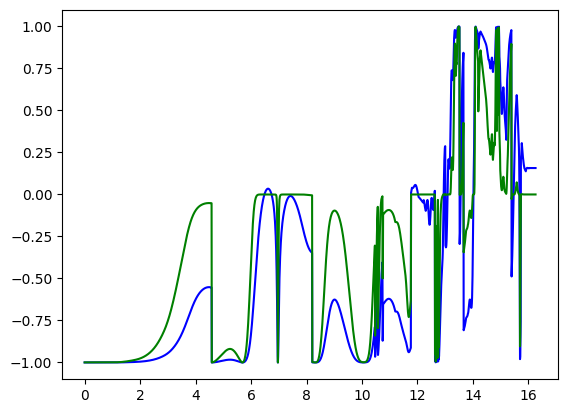

In [17]:
def u(e):
    k = 0.05
    #u = (np.exp(e*k) - np.exp(-e*k)) / (np.exp(e*k) + np.exp(-e*k))
    u = e**5

    return u

us = [u(i) for i in upitches]

plt.plot(ts, upitches, color='blue')
plt.plot(ts, us, color='green')
plt.show()